# Name : OLA WAHBA  


# The Spark Foundation GRIPFEB21 

## Task 2: Prediction using UnSupervised ML


# Objective : From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually


#Importing libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set()

# Import Dataset

In [21]:
iris=pd.read_csv("https://raw.githubusercontent.com/OLA333/The-Spark-Foundation/main/Iris.csv")
print('Data imported successfully')


Data imported successfully


# **** Data  Exploration ****
--------------------------------------------------------------------------------

# Display first five rows of dataset

In [22]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Preparing the data

In [36]:
iris.drop('Id',axis=1,inplace=True)
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Get some information about Dataset

In [37]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [38]:
iris.shape

(150, 5)

In [39]:
iris.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [40]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

 From the above code : we do not have Null values in Dataset

# Visualization

# pair plot

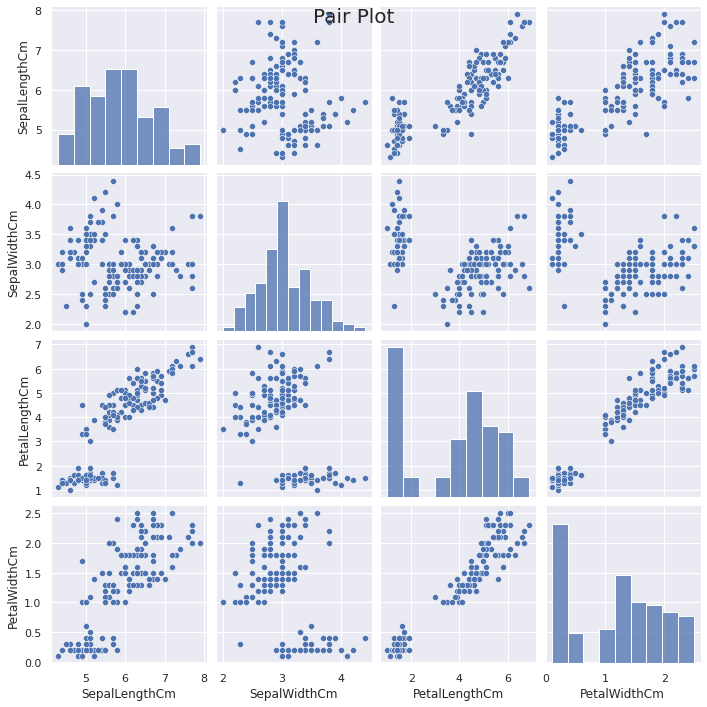

In [41]:
sns.pairplot(iris)
plt.suptitle('Pair Plot',fontsize=20)
plt.show()

# FacetGrid Plot

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


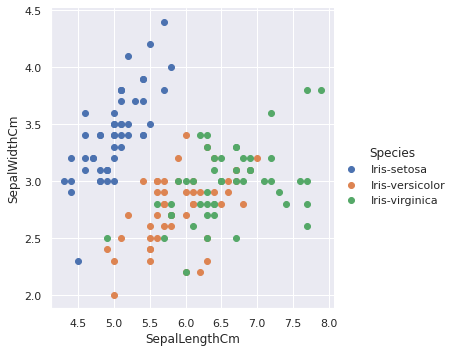

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
sns.FacetGrid(iris,hue='Species',size=5)\
.map(plt.scatter,'SepalLengthCm','SepalWidthCm')\
.add_legend()

# Boxplot




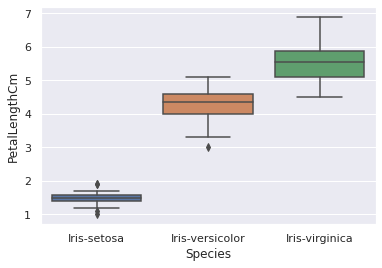

In [44]:
sns.boxplot(x='Species',y='PetalLengthCm',data=iris)


# Strip plot

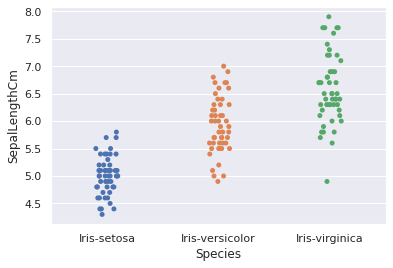

In [45]:
ax=sns.stripplot(x='Species',y='SepalLengthCm',data=iris,jitter=True,edgecolor='gray')


# Correlatio Matrix

In [42]:
corr=iris.corr()
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


# Plotting heat map

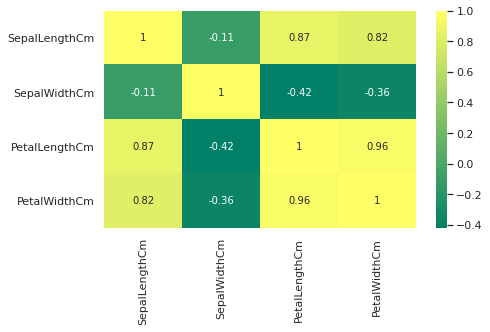

In [46]:
plt.figure(figsize=(7,4))
sns.heatmap(iris.corr(),annot=True,cmap='summer')

# Clustring

In [48]:
#Loading required variables in a DataFrame for Clustering
iris_new = iris.iloc[:,1:4]
iris_new.head()

,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,3.5,1.4,0.2
1,3.0,1.4,0.2
2,3.2,1.3,0.2
3,3.1,1.5,0.2
4,3.6,1.4,0.2


In [49]:
# Checking the WCSS (Within Cluster Sum of Squares)
wcss = []

for i in range(1,8):
    kmeans = KMeans(i)
    kmeans.fit(iris_new)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

[578.6560666666667,
 105.16576351752822,
 47.95582906463268,
 34.266958907496914,
 28.467429720113856,
 24.138533963585438,
 20.7283102289867]

# Plot Elbow Graph

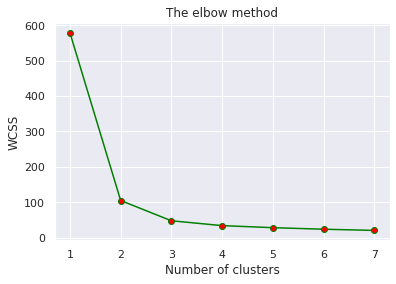

In [51]:
#The Elbow Method
plt.plot(range(1,8),wcss,color='green',marker='o',markerfacecolor='red')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')#within cluster sum of spares
plt.show()

From the plot, we can see that k=3 will be the optimum number of Cluster for this given Datase


# Cluster Table

---



In [53]:
kmeans = KMeans(3, random_state = 1)
kmeans.fit(iris_new)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [56]:
# Creating a summary table

cluster_table = iris.iloc[:,1:6]
cluster_table['Cluster'] = kmeans.fit_predict(iris_new)
cluster_table

,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,3.5,1.4,0.2,Iris-setosa,1
1,3.0,1.4,0.2,Iris-setosa,1
2,3.2,1.3,0.2,Iris-setosa,1
3,3.1,1.5,0.2,Iris-setosa,1
4,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...
145,3.0,5.2,2.3,Iris-virginica,0
146,2.5,5.0,1.9,Iris-virginica,0
147,3.0,5.2,2.0,Iris-virginica,0
148,3.4,5.4,2.3,Iris-virginica,0


# Visualising the clusters


In [58]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

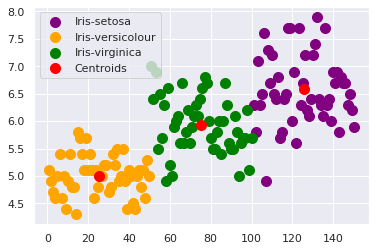

In [59]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

# 3d scatterplot 


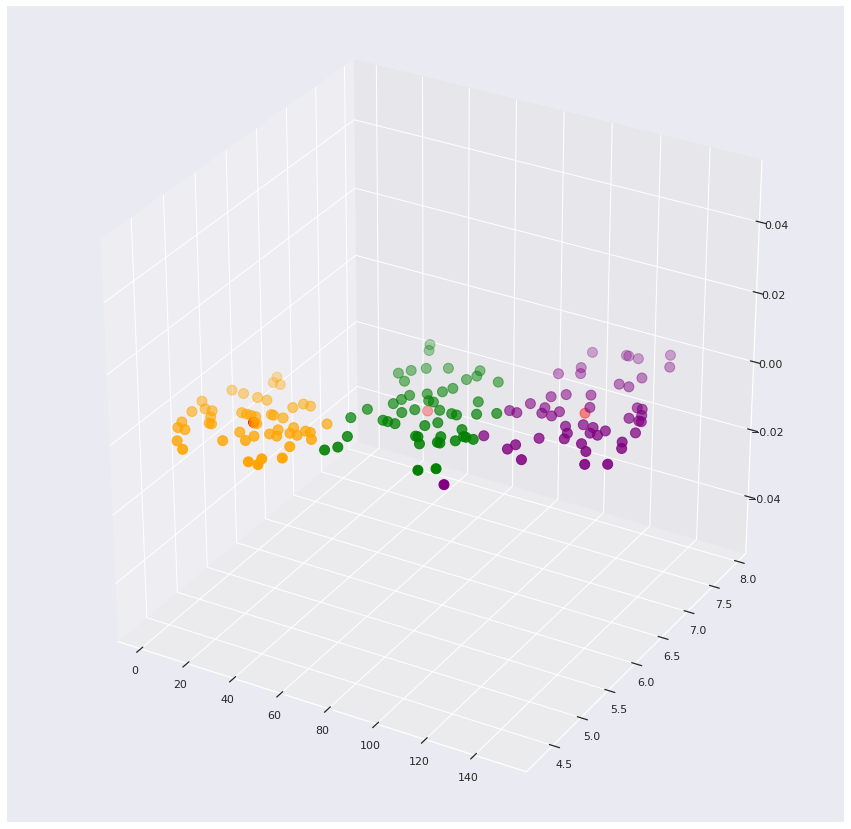

In [60]:

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.show()